ACTIVITY-1

IMAGE SEGMENTIOV IN OPEN CV


**DESCRIPTION:**

**Image Segmentation**

This program performs automatic image segmentation using OTSU thresholding and morphological operations.

**1: Original Image**

Displays the uploaded input image.

This is the raw image before processing.

**2: Mask Image**

Generated using OTSU thresholding.

Separates foreground and background automatically.

White region → Detected object

Black region → Background

Morphological closing is applied to remove small holes and noise.

**3: Segmented Image**

The mask is applied to the original image.

Only the detected foreground object remains visible.

Background is removed (set to black).

**4: Saved Output**

The final segmented image is saved as:

segmented_output.png


Saving Y67.JPG to Y67.JPG


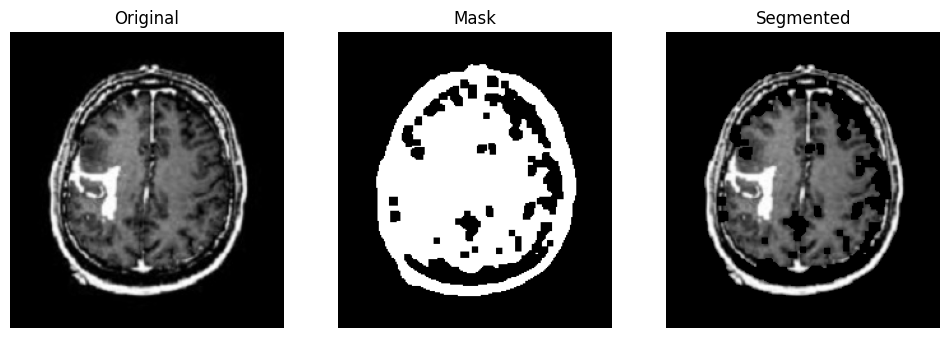

In [8]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
pil_img = Image.open(image_path).convert("RGB")
img = np.array(pil_img)
original = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
_, thresh = cv2.threshold(
    blur, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
mask_binary = mask // 255
segmented = original * np.stack([mask_binary]*3, axis=-1)
segmented_pil = Image.fromarray(segmented.astype(np.uint8))
segmented_pil.save("segmented_output.png")
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(original)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask, cmap="gray")
plt.axis("off")
plt.subplot(1,3,3)
plt.title("Segmented")
plt.imshow(segmented)
plt.axis("off")
plt.show()